In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
df = pandas.read_csv('data/Solar_Power_Monthly.csv')
df.head

<bound method NDFrame.head of     Measurement Time  Production (kWh)
0      4/1/2024 0:00              57.3
1      4/2/2024 0:00              64.9
2      4/3/2024 0:00              20.2
3      4/4/2024 0:00              23.3
4      4/5/2024 0:00              72.5
..               ...               ...
362   3/29/2025 0:00              11.6
363   3/30/2025 0:00              36.1
364   3/31/2025 0:00              42.6
365    4/1/2025 0:00             124.0
366    4/2/2025 0:00             106.0

[367 rows x 2 columns]>

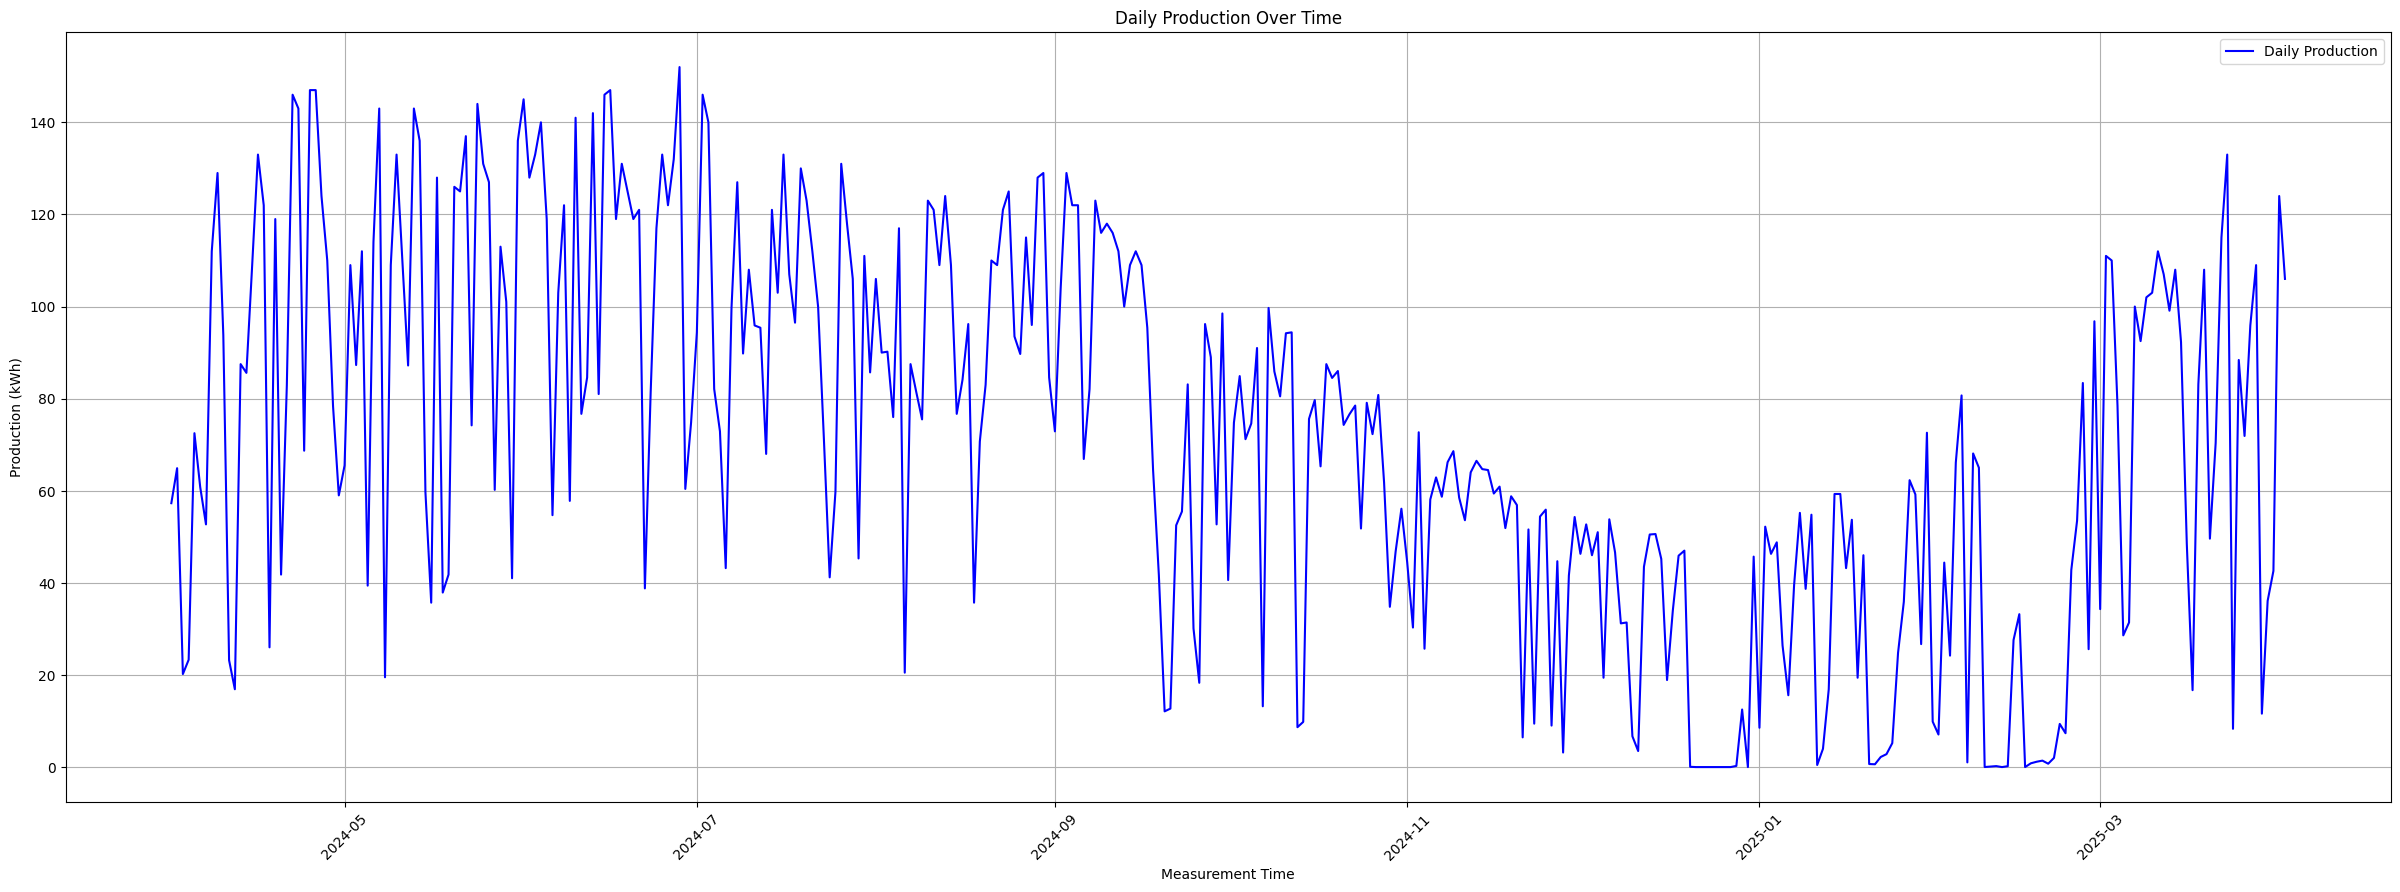

In [2]:
df['Measurement Time'] = pandas.to_datetime(df['Measurement Time'])

# Plot Hourly_Temp vs Datetime
plt.figure(figsize=(30, 10))
plt.plot(df['Measurement Time'], df['Production (kWh)'], label='Daily Production', color='b')
plt.xlabel('Measurement Time')
plt.ylabel('Production (kWh)')
plt.title('Daily Production Over Time')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

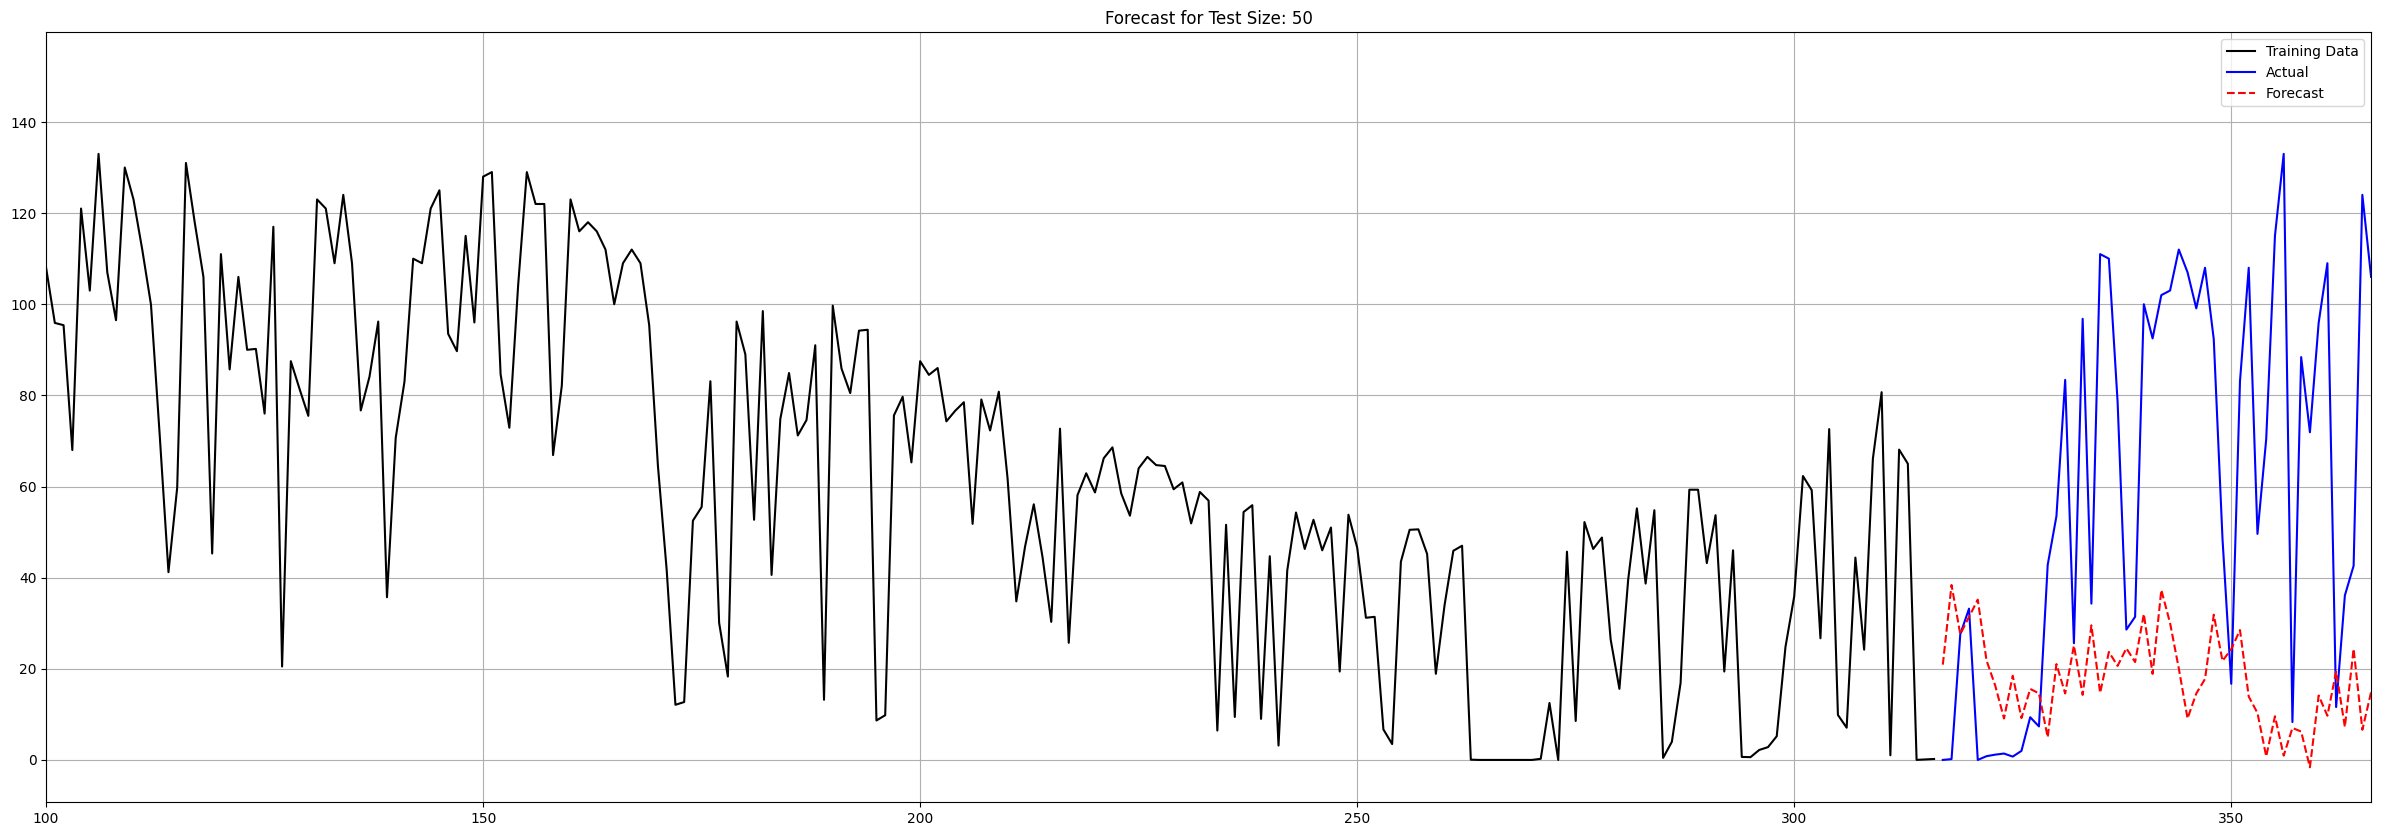

Forecast for i=-50:
20.911720532032415
Actual:
0.0

--------------------------------------------------



ZeroDivisionError: float division by zero

In [23]:
y = df["Production (kWh)"]
actual_vs_forecast = []
m = 0
i = -50
trainy = df["Production (kWh)"].iloc[:i]  # Training set
testy = df["Production (kWh)"].iloc[i:]   # Testing set

# Fit SARIMAX model
model = SARIMAX(trainy, order=(0, 1, 2), seasonal_order=(1, 1, 1, 30))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=abs(i))  # Forecast length matches test set size
plt.figure(figsize=(30, 10))
plt.xlim(100,testy.index[-1])
plt.plot(trainy.index, trainy.values, label="Training Data", color='black')
plt.plot(testy.index, testy, label="Actual", color='blue')
plt.plot(testy.index, forecast, label="Forecast", color='red', linestyle='dashed')

plt.grid()
plt.legend()
plt.title(f"Forecast for Test Size: {abs(i)}")

plt.show()

print(f"Forecast for i={i}:")   
print(forecast.tolist()[0])  # Convert to list for cleaner output
print("Actual:")
print(testy.tolist()[i])
print("\n" + "-"*50 + "\n")  # Separator for readability
x = ((testy.tolist()[i] - forecast.tolist()[0]) / testy.tolist()[i])
m = x + m

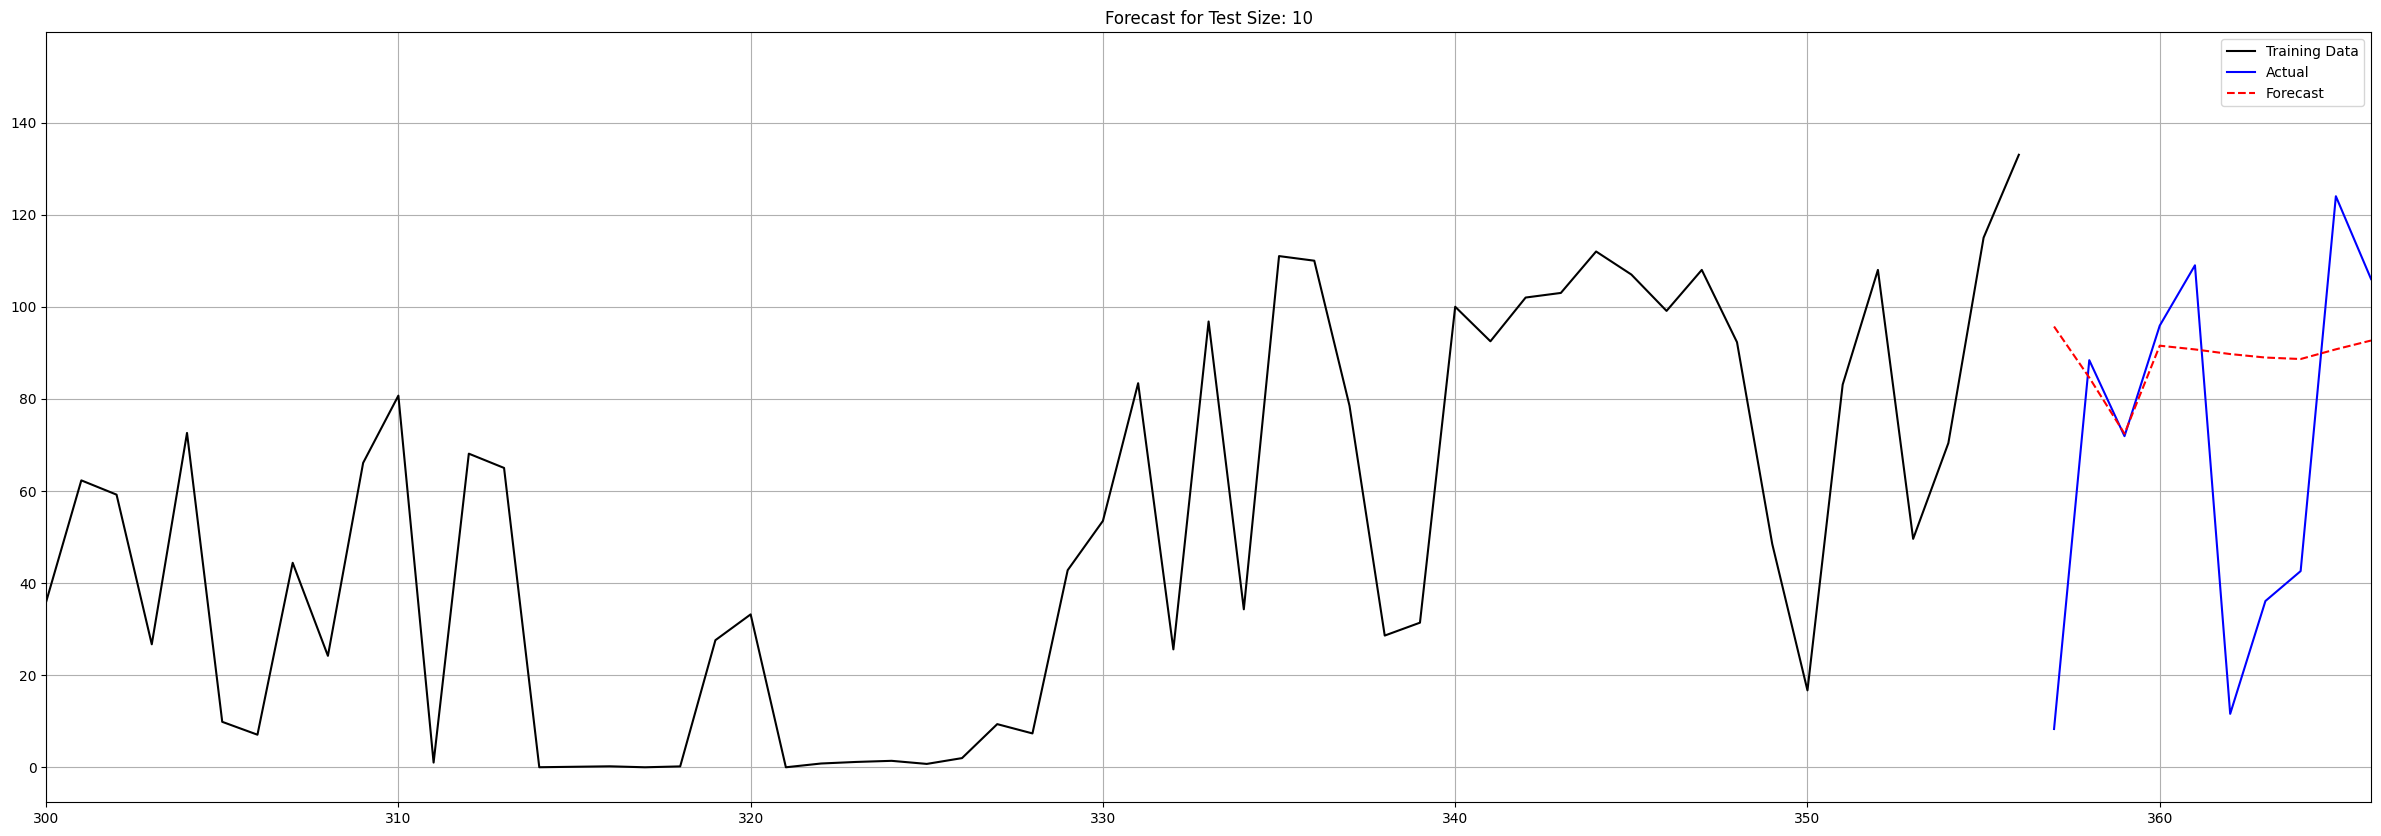

Forecast for i=-10:
95.70820473134191
Actual:
8.31

--------------------------------------------------



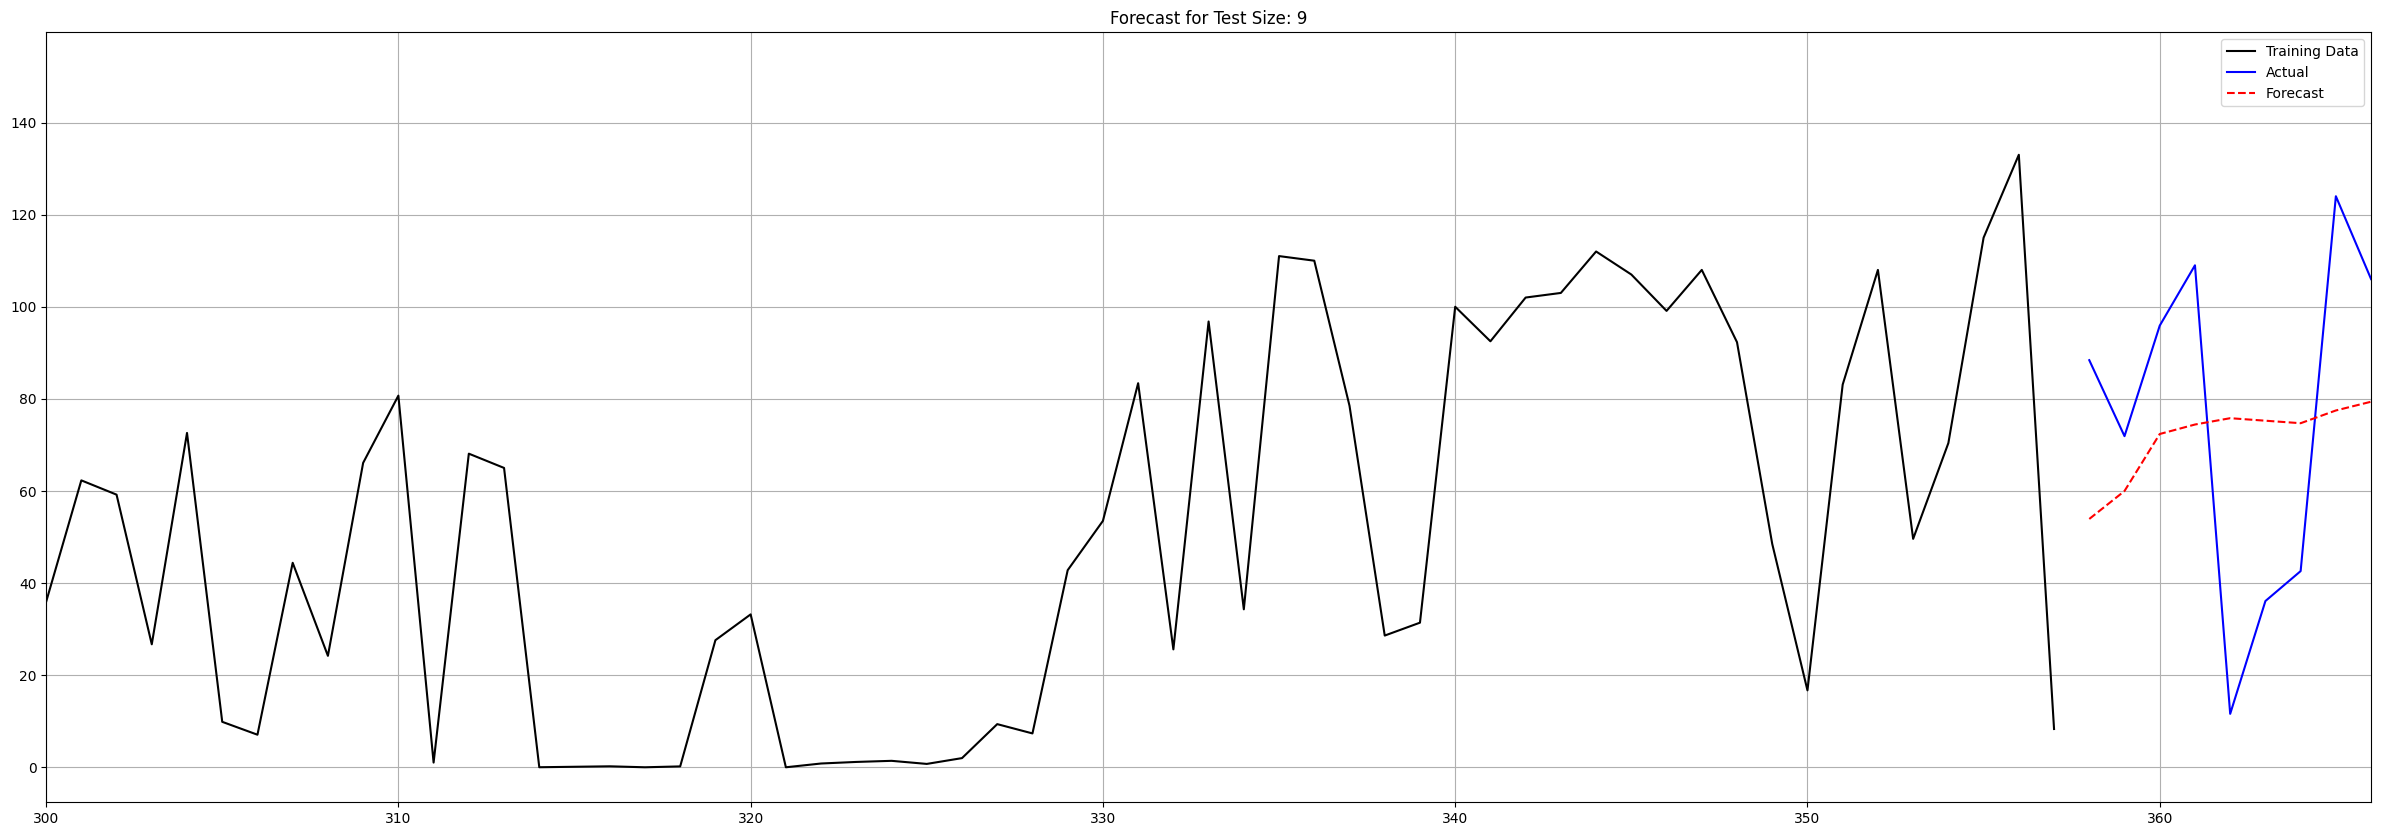

Forecast for i=-9:
53.92030002354168
Actual:
88.4

--------------------------------------------------



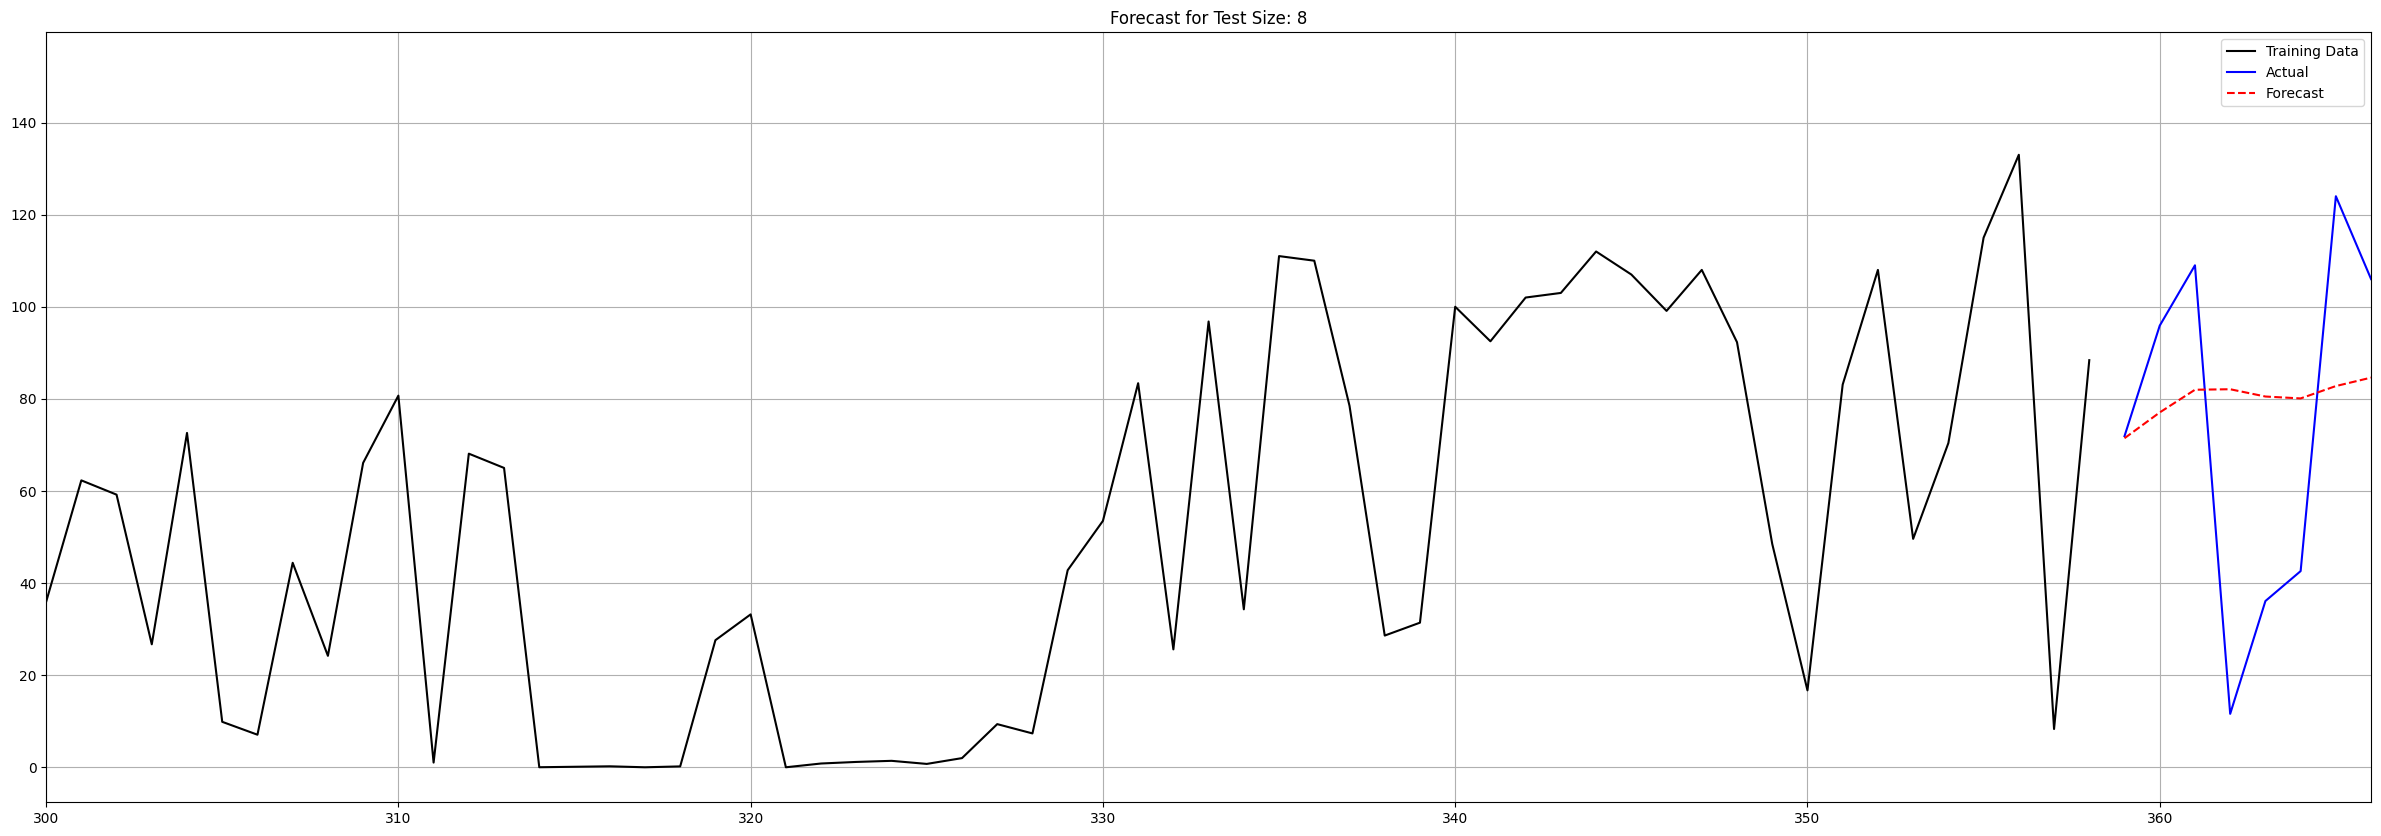

Forecast for i=-8:
71.45254246405672
Actual:
71.9

--------------------------------------------------



C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


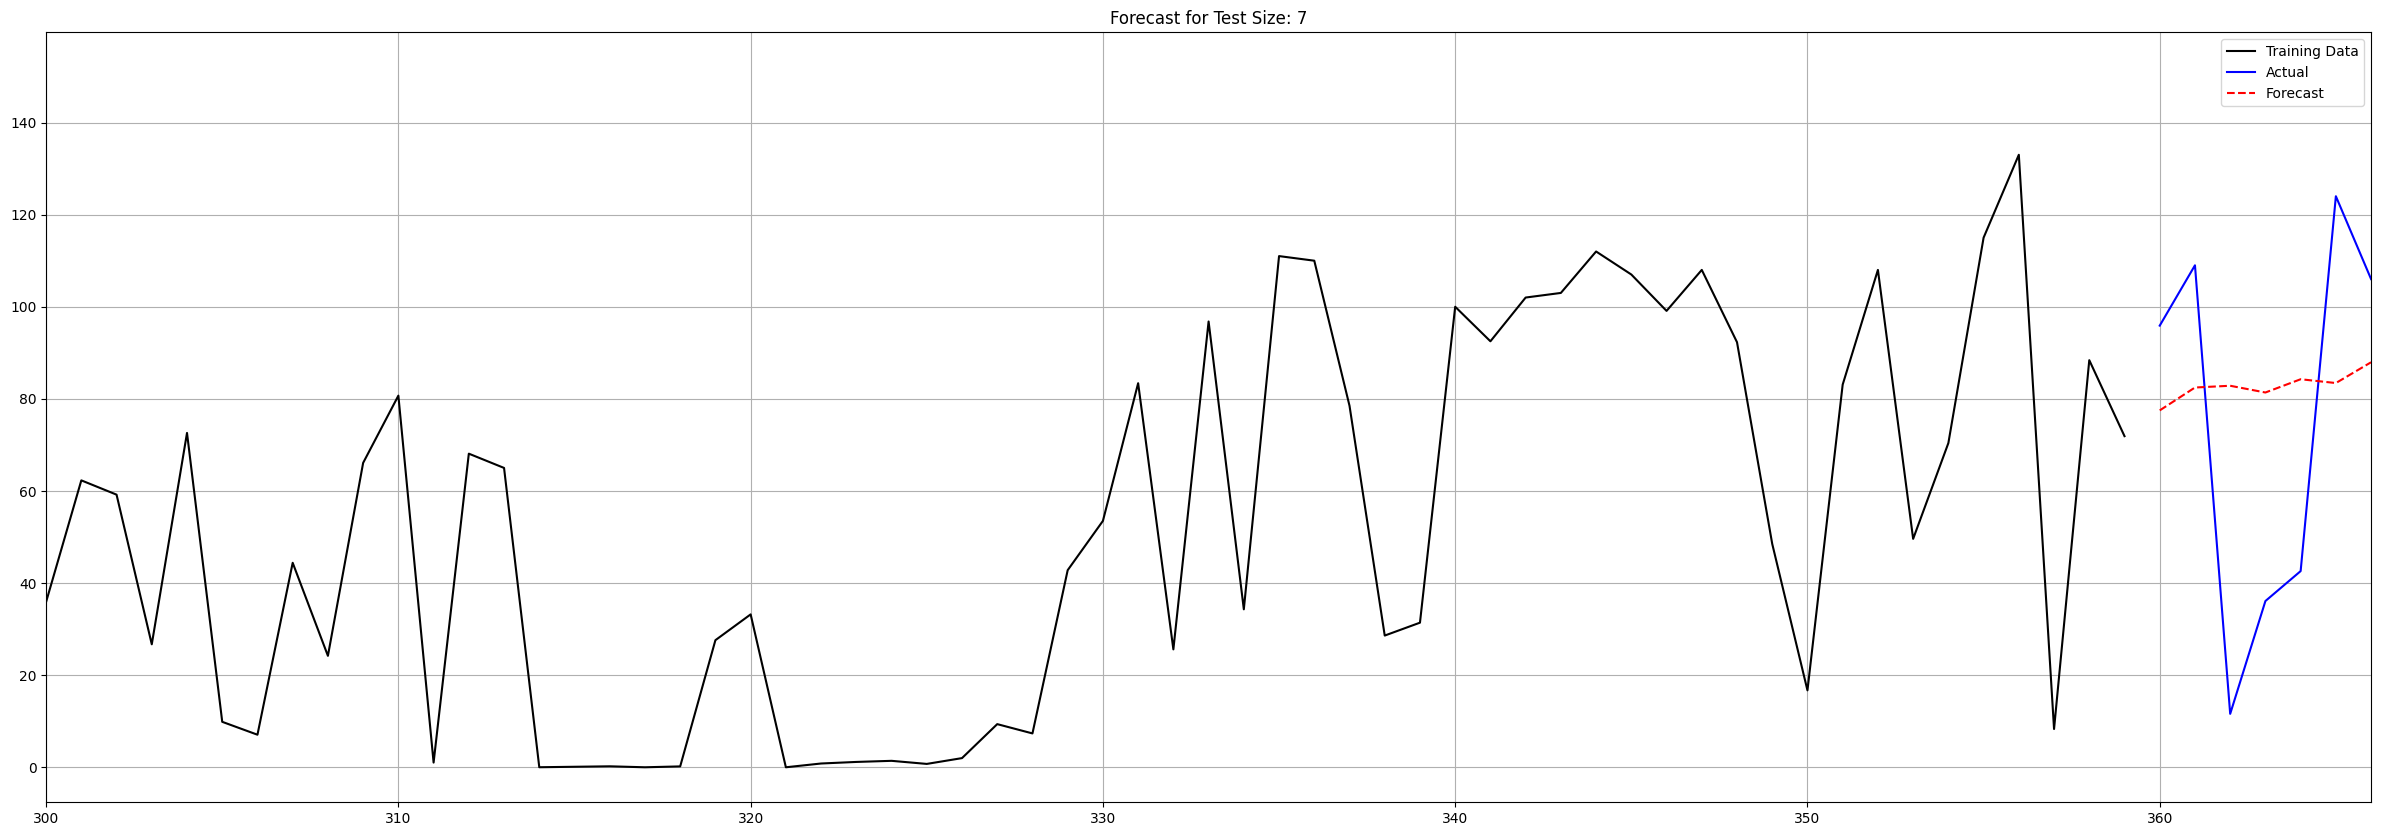

Forecast for i=-7:
77.49422148318136
Actual:
95.9

--------------------------------------------------



C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


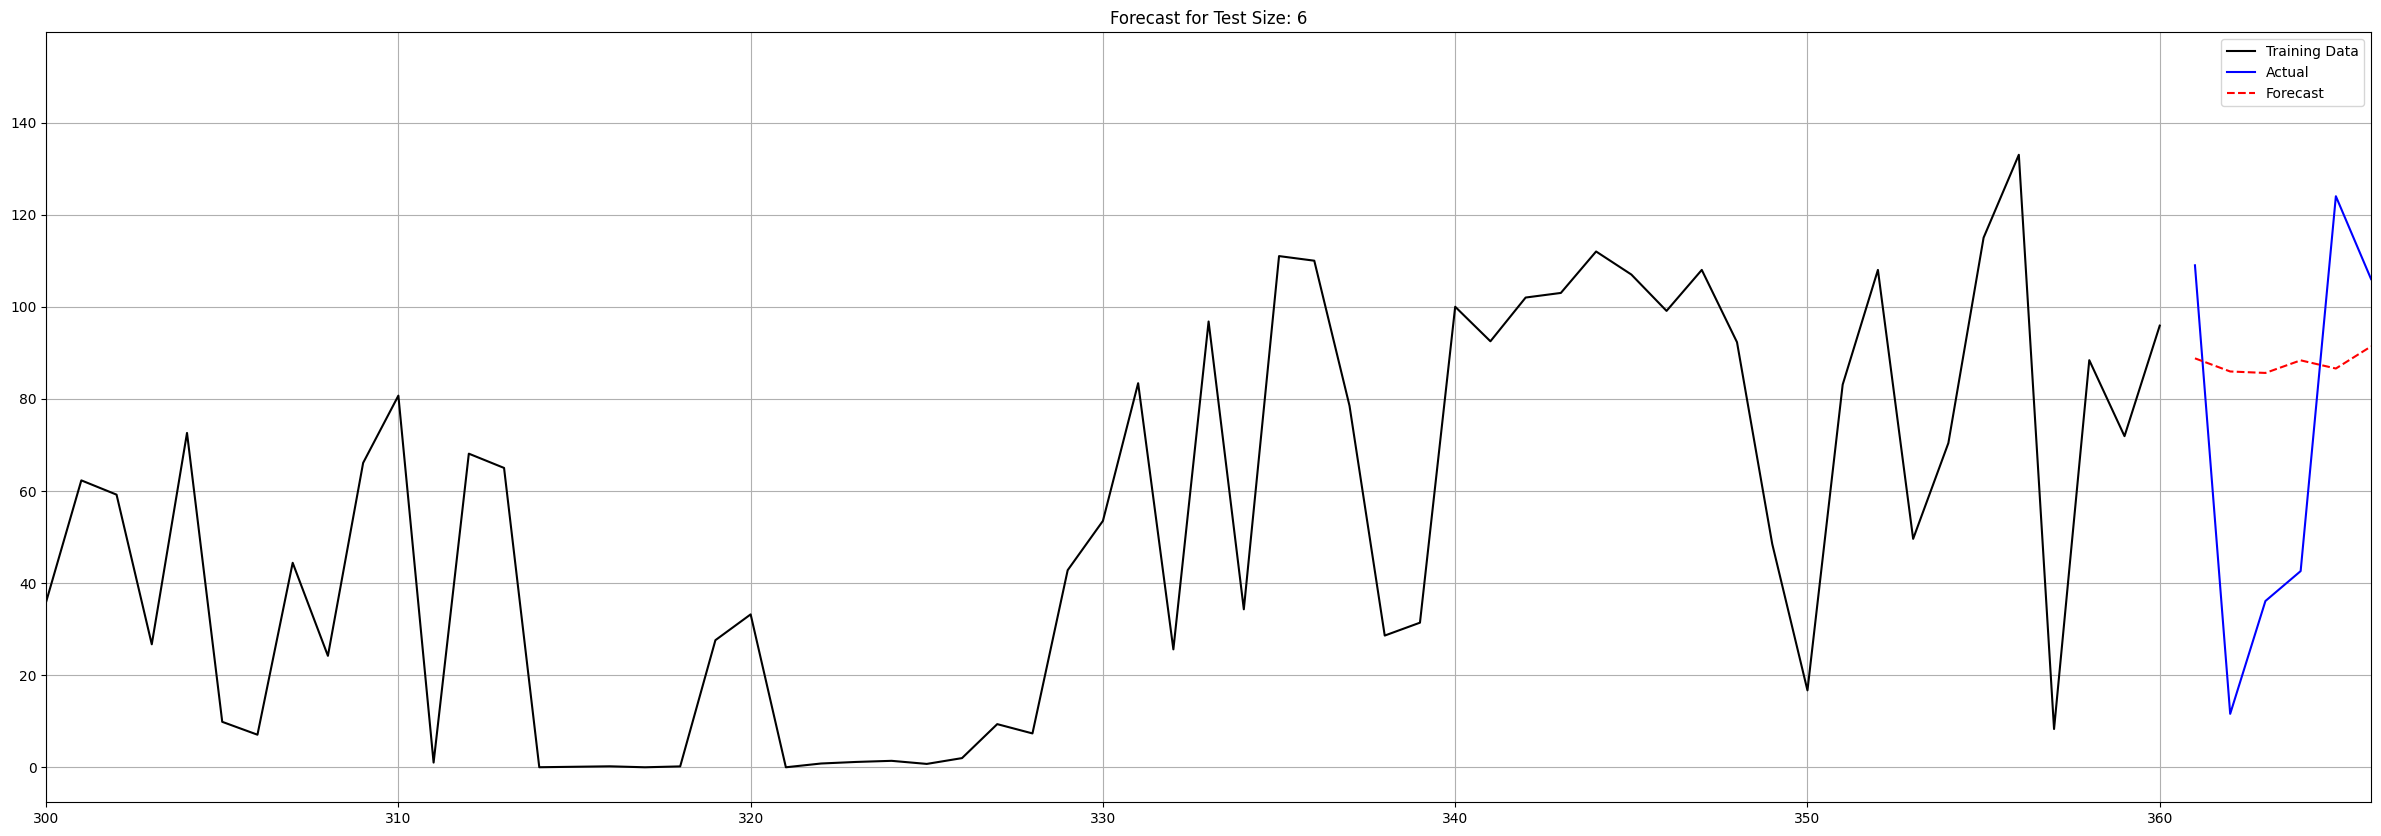

Forecast for i=-6:
88.79821686049314
Actual:
109.0

--------------------------------------------------



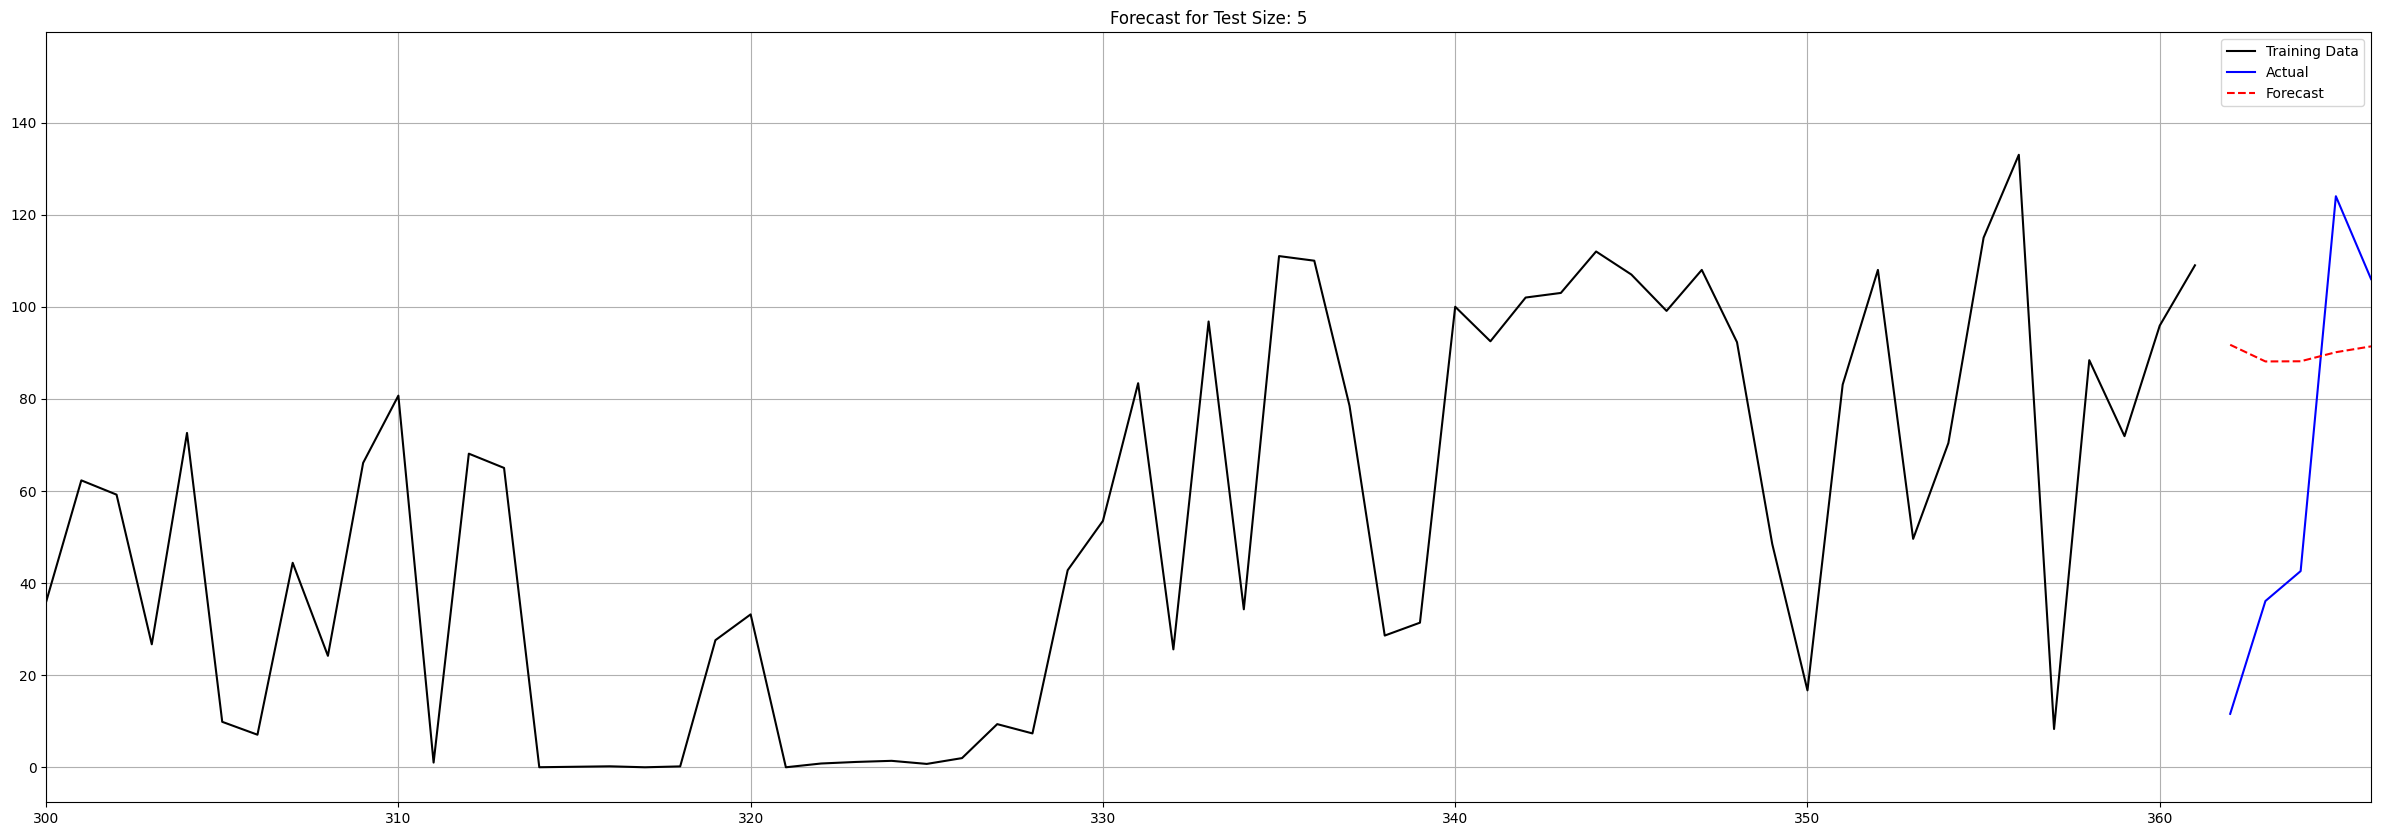

Forecast for i=-5:
91.74238720353199
Actual:
11.6

--------------------------------------------------



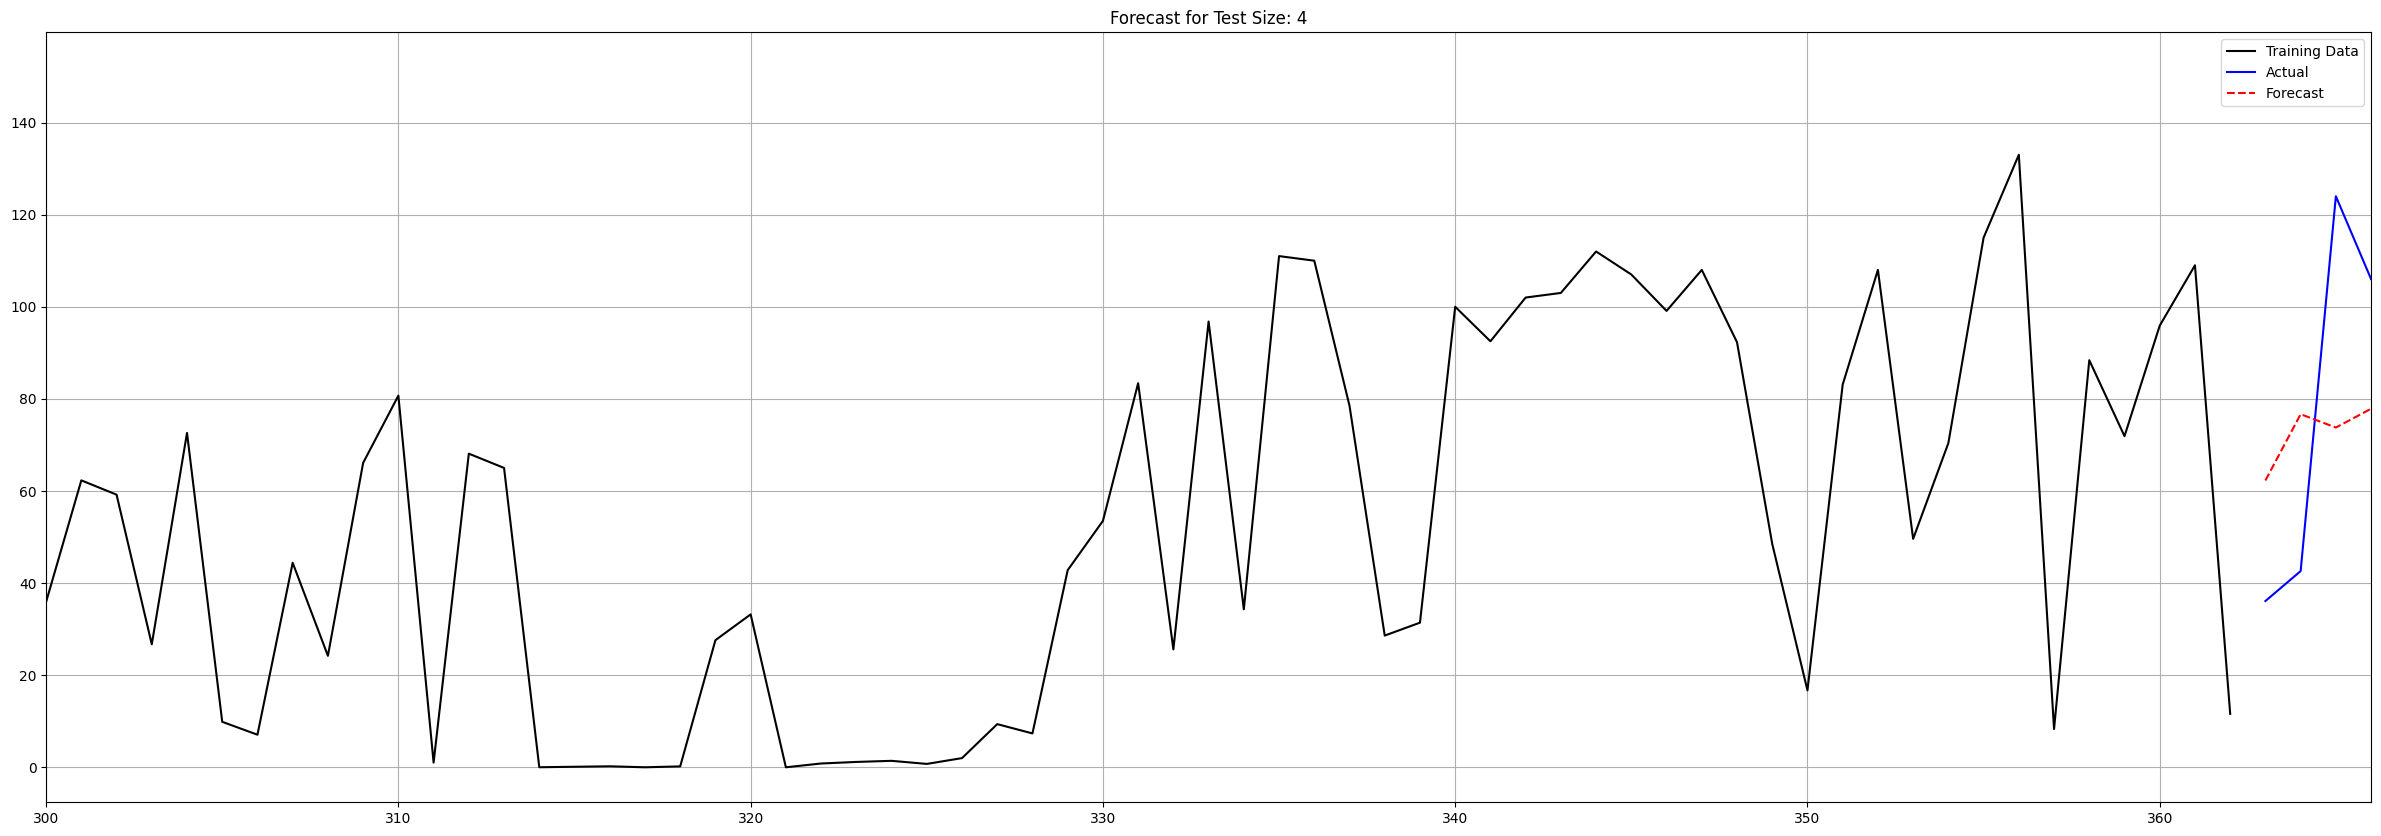

Forecast for i=-4:
62.27460362666485
Actual:
36.1

--------------------------------------------------



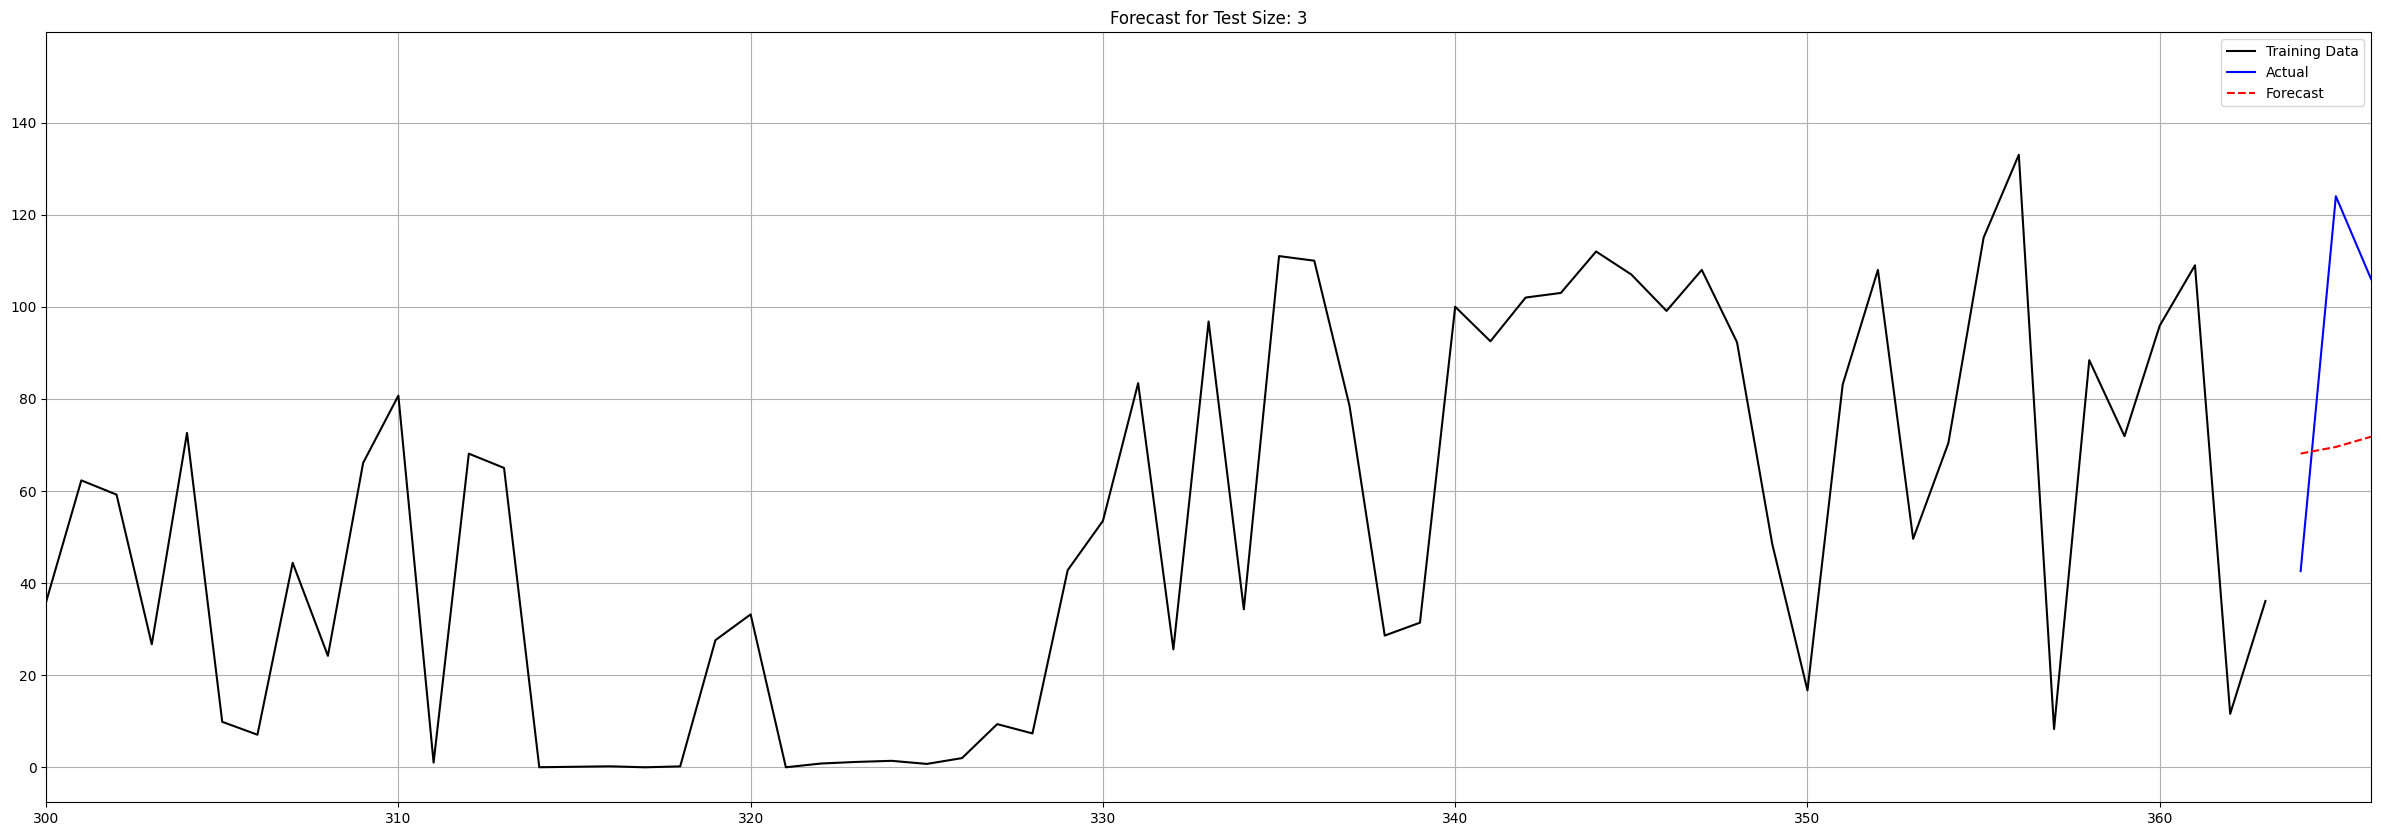

Forecast for i=-3:
68.12118692388518
Actual:
42.6

--------------------------------------------------



C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


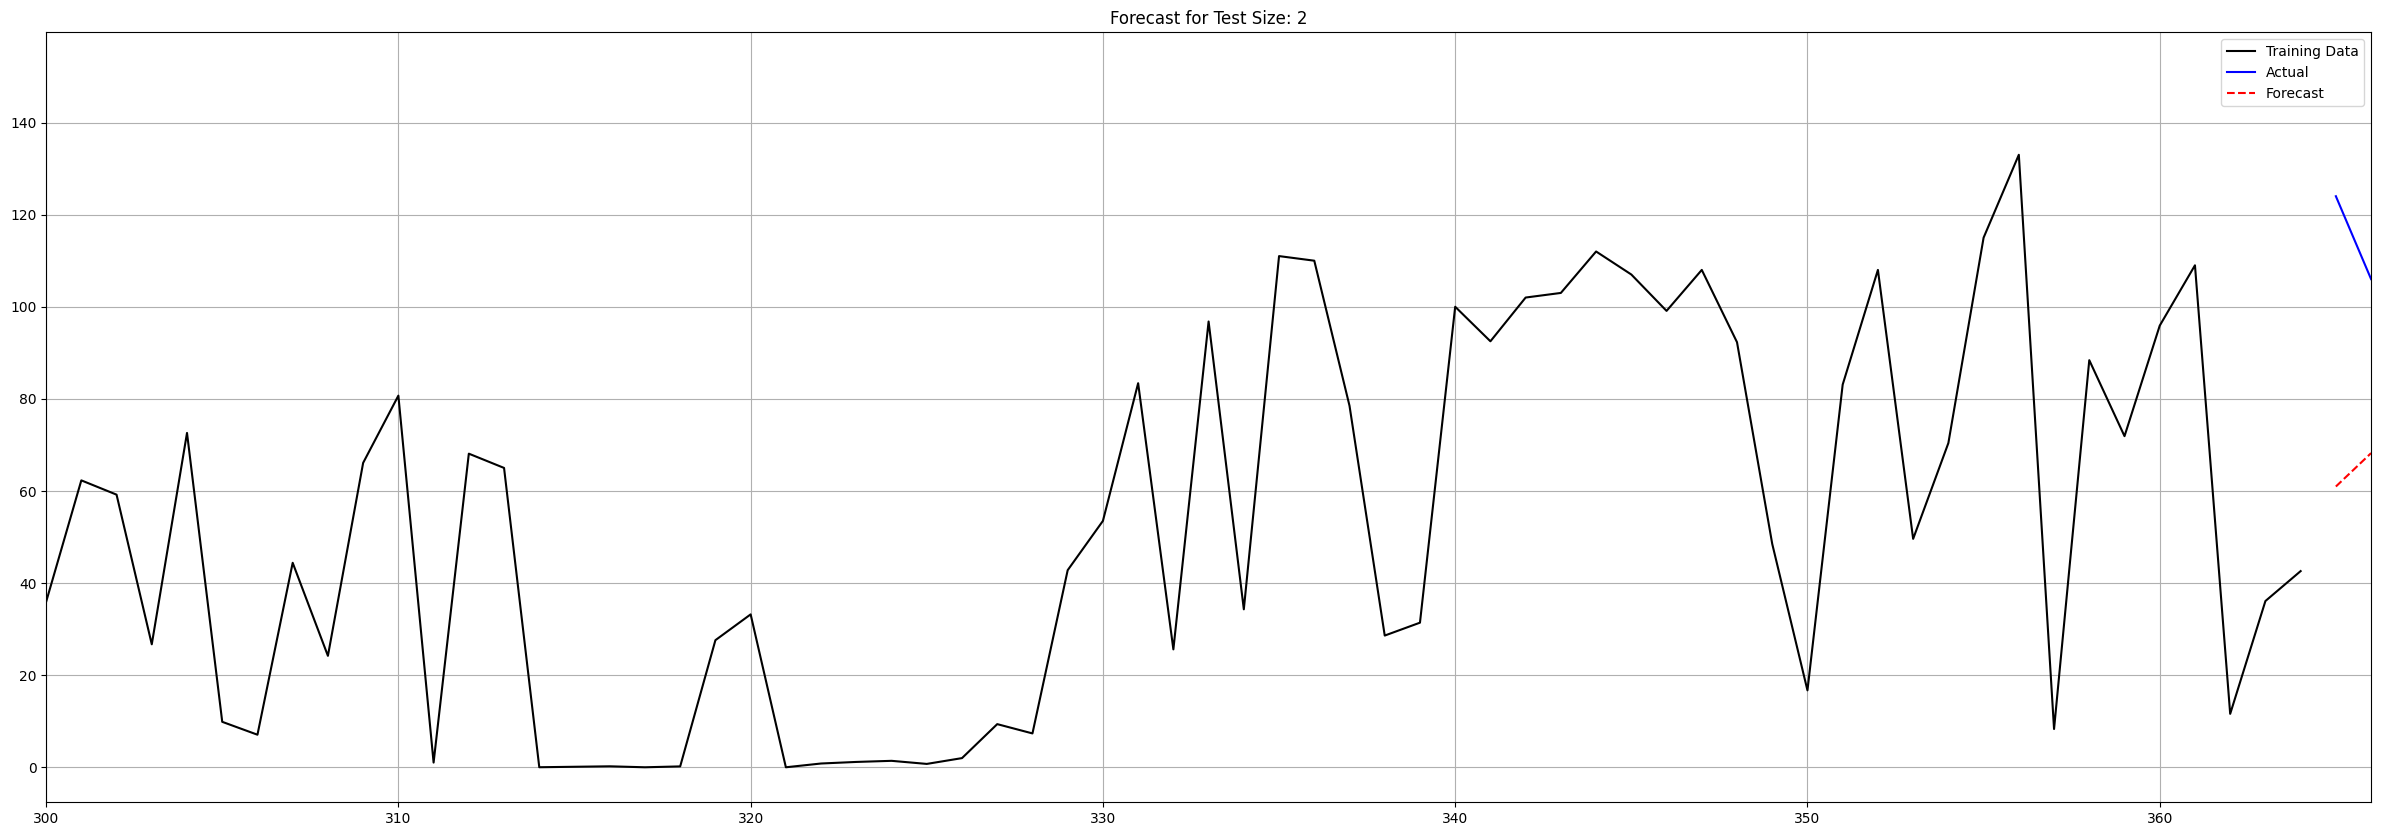

Forecast for i=-2:
60.9622589423258
Actual:
124.0

--------------------------------------------------



In [9]:
y = df["Production (kWh)"]
actual_vs_forecast = []
m = 0
for i in range(-10, -1, 1): 
    trainy = df["Production (kWh)"].iloc[:i]
    testy = df["Production (kWh)"].iloc[i:]
    
    # Fit SARIMAX model
    model = SARIMAX(trainy, order=(3, 1, 1), seasonal_order=(1, 1, 1, 30))
    model_fit = model.fit()
    
    # Forecasting
    forecast = model_fit.forecast(steps=abs(i))  # Forecast length matches test set size
    plt.figure(figsize=(30, 10))
    plt.xlim(300,testy.index[-1])
    plt.plot(trainy.index, trainy.values, label="Training Data", color='black')
    plt.plot(testy.index, testy, label="Actual", color='blue')
    plt.plot(testy.index, forecast, label="Forecast", color='red', linestyle='dashed')
    
    plt.grid()
    plt.legend()
    plt.title(f"Forecast for Test Size: {abs(i)}")
        
    plt.show()

    print(f"Forecast for i={i}:")   
    print(forecast.tolist()[0])  # Convert to list for cleaner output
    print("Actual:")
    print(testy.tolist()[i])
    print("\n" + "-"*50 + "\n")  # Separator for readability
    x = ((testy.tolist()[i] - forecast.tolist()[0]) / testy.tolist()[i])
    m = x + m

In [7]:
absolute_m = abs(m)
print(absolute_m)
percent = (absolute_m/9)*(100)
print("percentage: ")
print(percent)
accuracy = 100 * (1 - percent)
print(accuracy)

17.04312746909588
percentage: 
189.3680829899542
-18836.80829899542


In [20]:
auto_model = auto_arima(trainy, seasonal=True, stepwise=False, trace=True)
print(auto_model.order)

C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=3174.198, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=3053.614, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=3044.139, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=3046.013, Time=0.08 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=3044.500, Time=0.12 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=3126.227, Time=0.04 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=3044.616, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=3045.564, Time=0.10 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=3047.113, Time=0.14 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=3046.352, Time=0.17 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=3088.398, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=3046.514, Time=0.13 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=3046.801, Time=0.13 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=3048.199, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=3086.683, Time=0.09 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=3046.424, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=3046.969, Time=0.19 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=3080.361, Time=0.04 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=3044.757, Time=0.16 sec


C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=3068.664, Time=0.13 sec

Best model:  ARIMA(0,1,2)(0,0,0)[1] intercept
Total fit time: 2.314 seconds
(0, 1, 2)
